In [63]:
from lib.get_L2 import get_M, dens_gauss_shift,get_extension,get_Bais
from lib.get_L2 import *
import numpy as np
import scipy as sp
import pandas as pd
import ot
import matplotlib.pyplot as plt 
import seaborn as sns
import time
from multiprocessing import Pool
import glob
import torch

In [75]:
plt.rc('text', usetex=True)
plt.rc('font',**{'family':'cmr10','serif':['Computer Modern Roman'],'size':'26'})
plt.rc('axes.formatter', use_mathtext=True)
centm=1/2.54



# Fig 1

In [3]:
seed = np.random.SeedSequence()
gen = np.random.Generator(np.random.MT19937(seed))

In [4]:
N = 1000
std = .05
jump = .3
dim = 1
jump_prob = .5
ve = .01
x_e = y_e = np.linspace(0,1,1000,endpoint=False)
M0 = dens_gauss_shift(*np.meshgrid(y_e,x_e), jump, std, jump_prob)
M1 = dens_gauss_shift(*np.meshgrid(y_e,x_e), jump, np.sqrt(std**2 + ve), jump_prob)
M10 = get_M(gen,10,std,jump,ve)
M100 = get_M(gen,100,std,jump,ve)
M1000 = get_M(gen,1000,std,jump,ve)

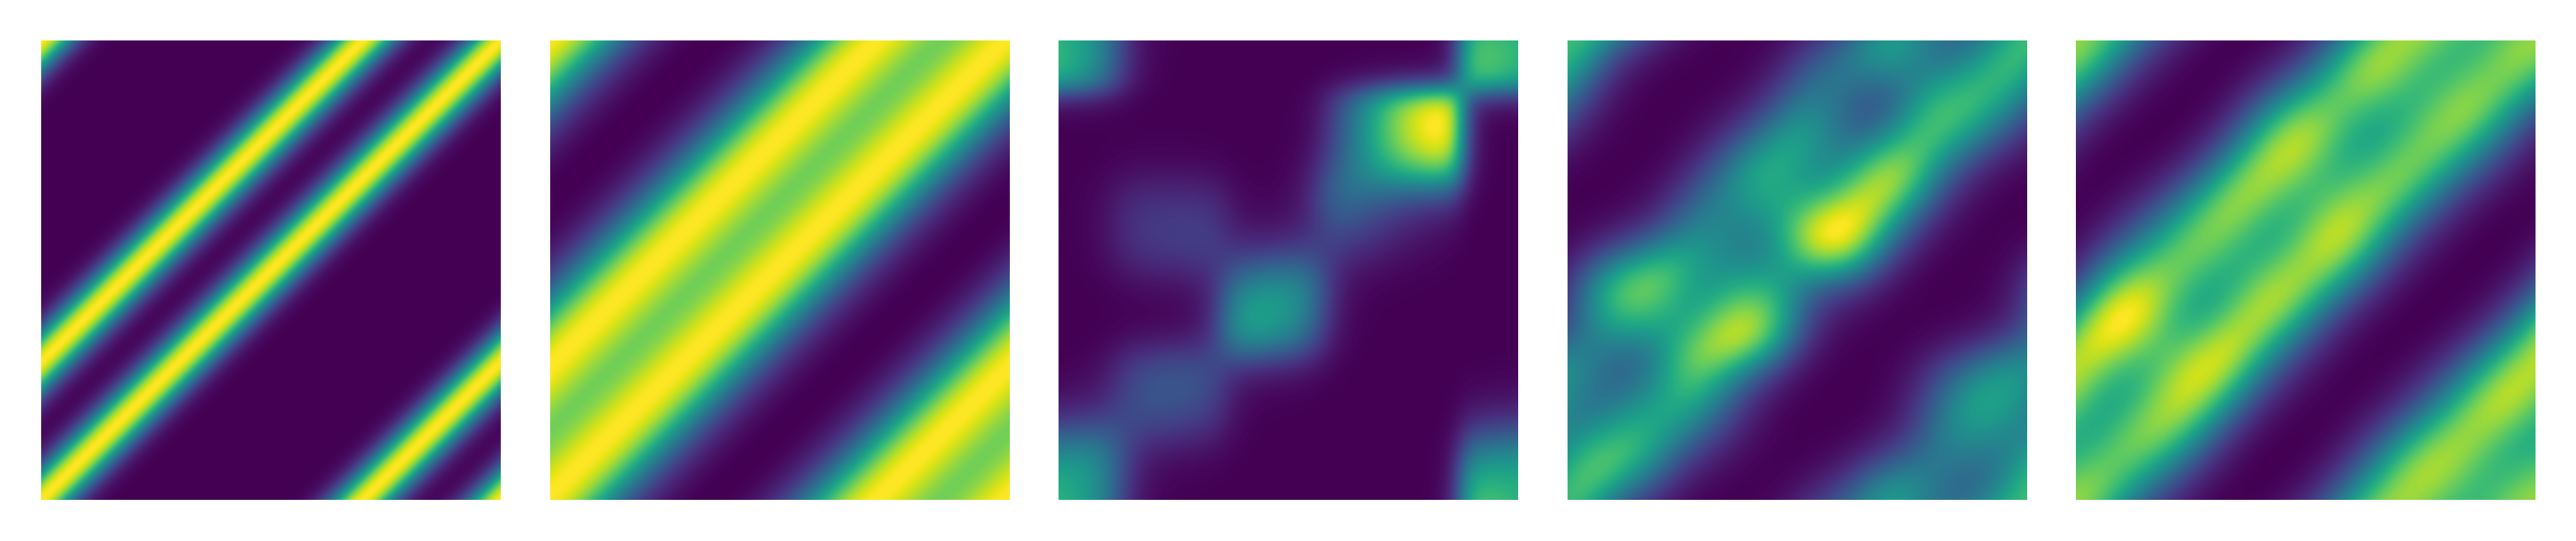

In [6]:
Mlist = [M0,M1,M10,M100,M1000]
fig, axs = plt.subplots(ncols=5, figsize=(16*centm,16/4*centm),dpi=600,facecolor="w") 
for i,M in zip([0,1,2,3,4],Mlist):
    axs[i].imshow(M,origin='lower')
    axs[i].axis('off')
plt.tight_layout()
plt.show()

# Fig 2

In [4]:
res = {"L2" : [],
    "L2_true" : [],
    "N" : [],
    "std" : [],
    "jump" : [],
    "jump_prob" : [],
    "ve" : [],
    "dim" : []
    }
res = pd.DataFrame(res)

In [5]:
files = glob.glob("./Given_results_torus/*")
#files = glob.glob("./results_torus/*")

In [6]:
def read_res(A):
    return pd.read_csv(A)
if __name__ == '__main__':
    with Pool(16) as p:
        dfList = p.map(read_res,files)

In [7]:
res = []
for F in dfList:
    res.append(F)
res = pd.concat(res, axis=0, ignore_index=True)

In [8]:
D2a = res[(res['std'] == .01)&(res['dim'] == 1)]
D2b = res[(res['ve'] == .001)&(res['dim'] == 1)]

In [11]:
epsList = np.logspace(-3.7,1,48)
def get_l2a(eps):
    return get_Bais(std = .01,jump = .3 ,jump_prob = .5,ve = eps,Res = 1000)
def get_l2b(eps):
    return get_Bais(std = .025,jump = .3 ,jump_prob = .5,ve = eps,Res = 1000)
def get_l2c(eps):
    return get_Bais(std = .05,jump = .3 ,jump_prob = .5,ve = eps,Res = 1000)

In [12]:
tt = time.time()
if __name__ == '__main__':
    with Pool(16) as p:
        l2a = p.map(get_l2a,epsList)
        l2b = p.map(get_l2b,epsList)
        l2c = p.map(get_l2c,epsList)
print(time.time() - tt)

21.504440546035767


<AxesSubplot: xlabel='N', ylabel='L2'>

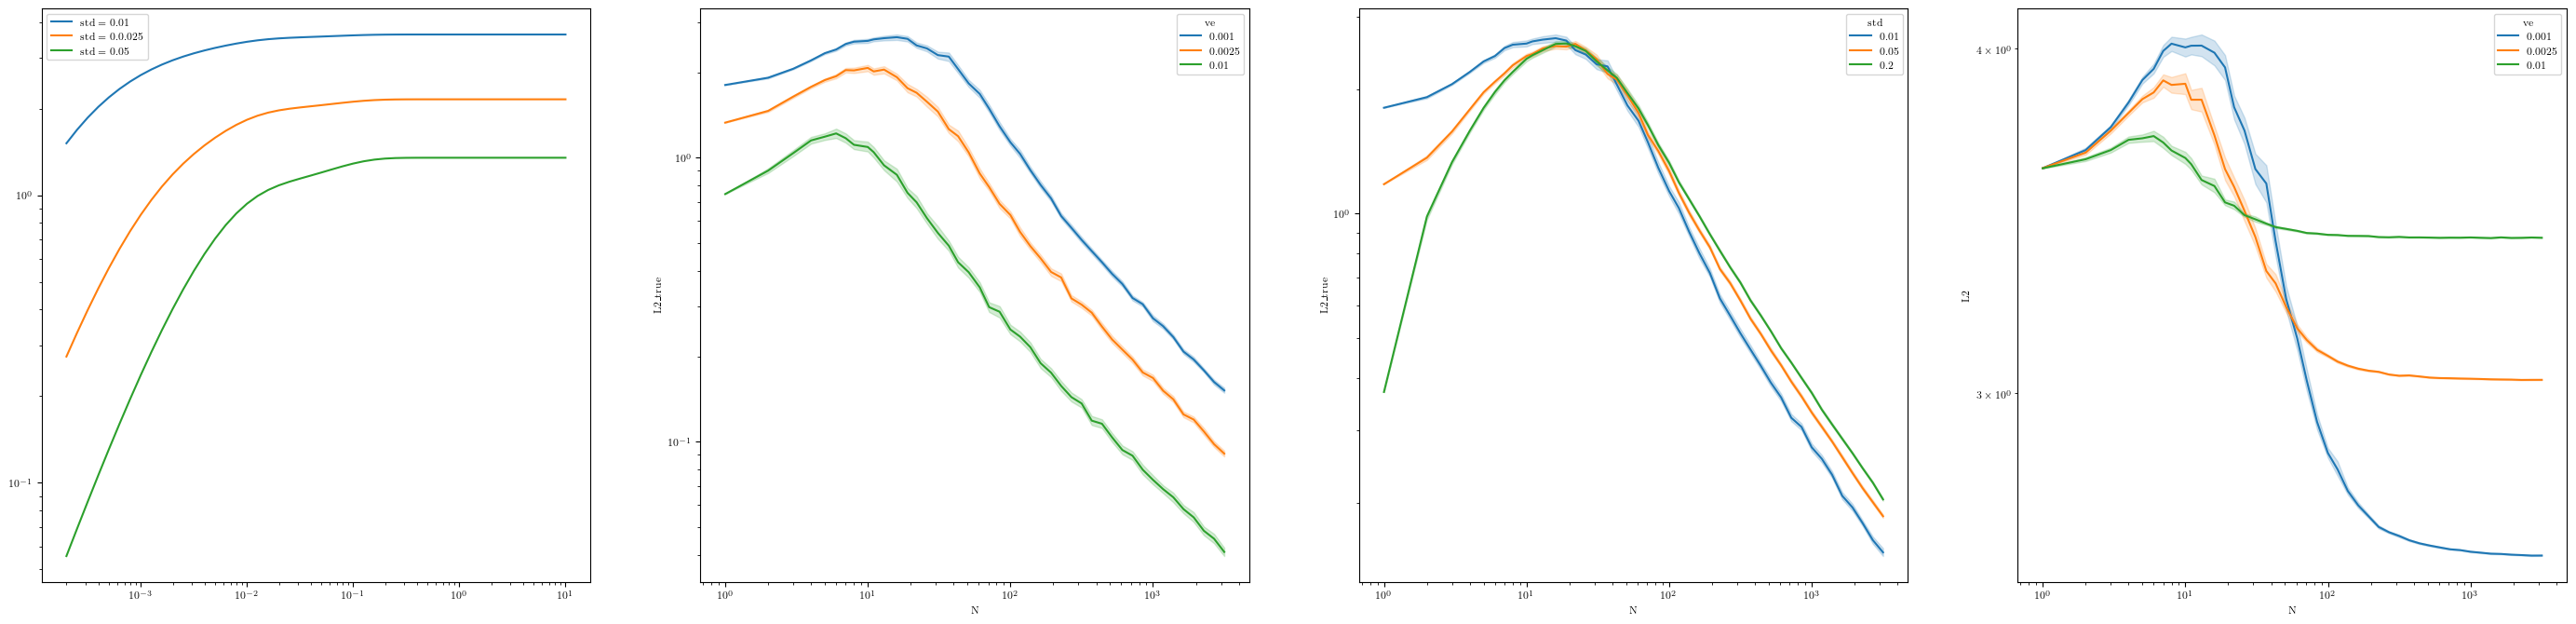

In [13]:
fig, ax = plt.subplots(ncols = 4, figsize = (35,8))
for a in ax:
    a.set_xscale('log')
    a.set_yscale('log')
ax[0].plot(epsList,l2a,label='std = 0.01', color = sns.color_palette("tab10")[0])
ax[0].plot(epsList,l2b,label='std = 0.0.025',color = sns.color_palette("tab10")[1])
ax[0].plot(epsList,l2c,label='std = 0.05', color = sns.color_palette("tab10")[2])
ax[0].legend()
sns.lineplot(data = D2a,x = 'N', y = 'L2_true', hue = 've', ax = ax[1],palette = 'tab10')
sns.lineplot(data = D2b,x = 'N', y = 'L2_true', hue = 'std', ax = ax[2],palette = 'tab10')
sns.lineplot(data = D2a,x = 'N', y = 'L2', hue = 've', ax = ax[3],palette = 'tab10')

# Fig 3

In [10]:
# sd = 820
# seed = np.random.SeedSequence(sd)
# std = 0.01
# jump = 0.3
# ve = 0.01
# fig,ax = plt.subplots(ncols=5,layout='tight', figsize=(16*centm,3.3*centm),dpi=600,facecolor="w")

# Nlist = [30,50,100,200,500]
# for i,a in enumerate(ax):
#     r1,r2,r3,r4,_ = get_extension(seed,Nlist[i], std, jump, ve, nev = 4)
#     a.plot(r1,r2,zorder = 0)
#     a.scatter(r3,r4, s = .3,zorder = 1,c = 'r')
#     a.axes.get_xaxis().set_visible(False)
#     a.axes.get_yaxis().set_visible(False)
#     a.set_title(f"N = {Nlist[i]}", color = 'black', y = 0.99,pad=-14,x=0.5)

In [ ]:
gen = np.random.Generator(np.random.MT19937(seed))
sd = 820
nev = [1,2]
seed = np.random.SeedSequence(sd)
std = 0.01
jump = 0.3
ve = 0.01
NPts = 100
dim =1
res = 500
jump_prob = .5
x,y = sample_Gau(gen, num = NPts ,std = std, shift = jump, dim = dim, shift_prob = jump_prob)
res_x = SolveOT(np.ones(NPts)/NPts,np.ones(NPts)/NPts,cost(x,x),1e-6,ve,10,returnSolver = True)
EK_x = res_x[1].toarray()
res_y = SolveOT(np.ones(NPts)/NPts,np.ones(NPts)/NPts,cost(x,y),1e-6,ve,10,returnSolver = True)
EK_y = res_y[1].toarray()
grid = res
x_e = np.linspace(0,1,grid,endpoint=False)
EK_x *= NPts**2
EK_y *= NPts**2
pot_y = 1/(np.sum(np.exp((-cost(x_e,y) + res_y[2].beta)/ve),axis=1))
pot_y = pot_y.T
F_Y = pot_y[:,np.newaxis]*np.exp((-cost(x_e,y) + res_y[2].beta)/ve)*NPts
B = EK_y@EK_x.T
eigval,eigvet = np.linalg.eig(B)
ind = np.argsort(-np.abs(eigval))
eigval = eigval[ind]
eigvet = eigvet[:,ind]
temp = eigvet[:,nev]
temp *= np.abs(temp[0])/temp[0]

In [27]:
(F_Y@EK_x.T).shape, np.real(temp/eigval[nev]).shape

((500, 100), (100, 3))

In [14]:
eigvet[:,1].shape

(100,)

In [58]:
!pwd

/home/bi/StochasticETO


[0.81369857 0.44979755]


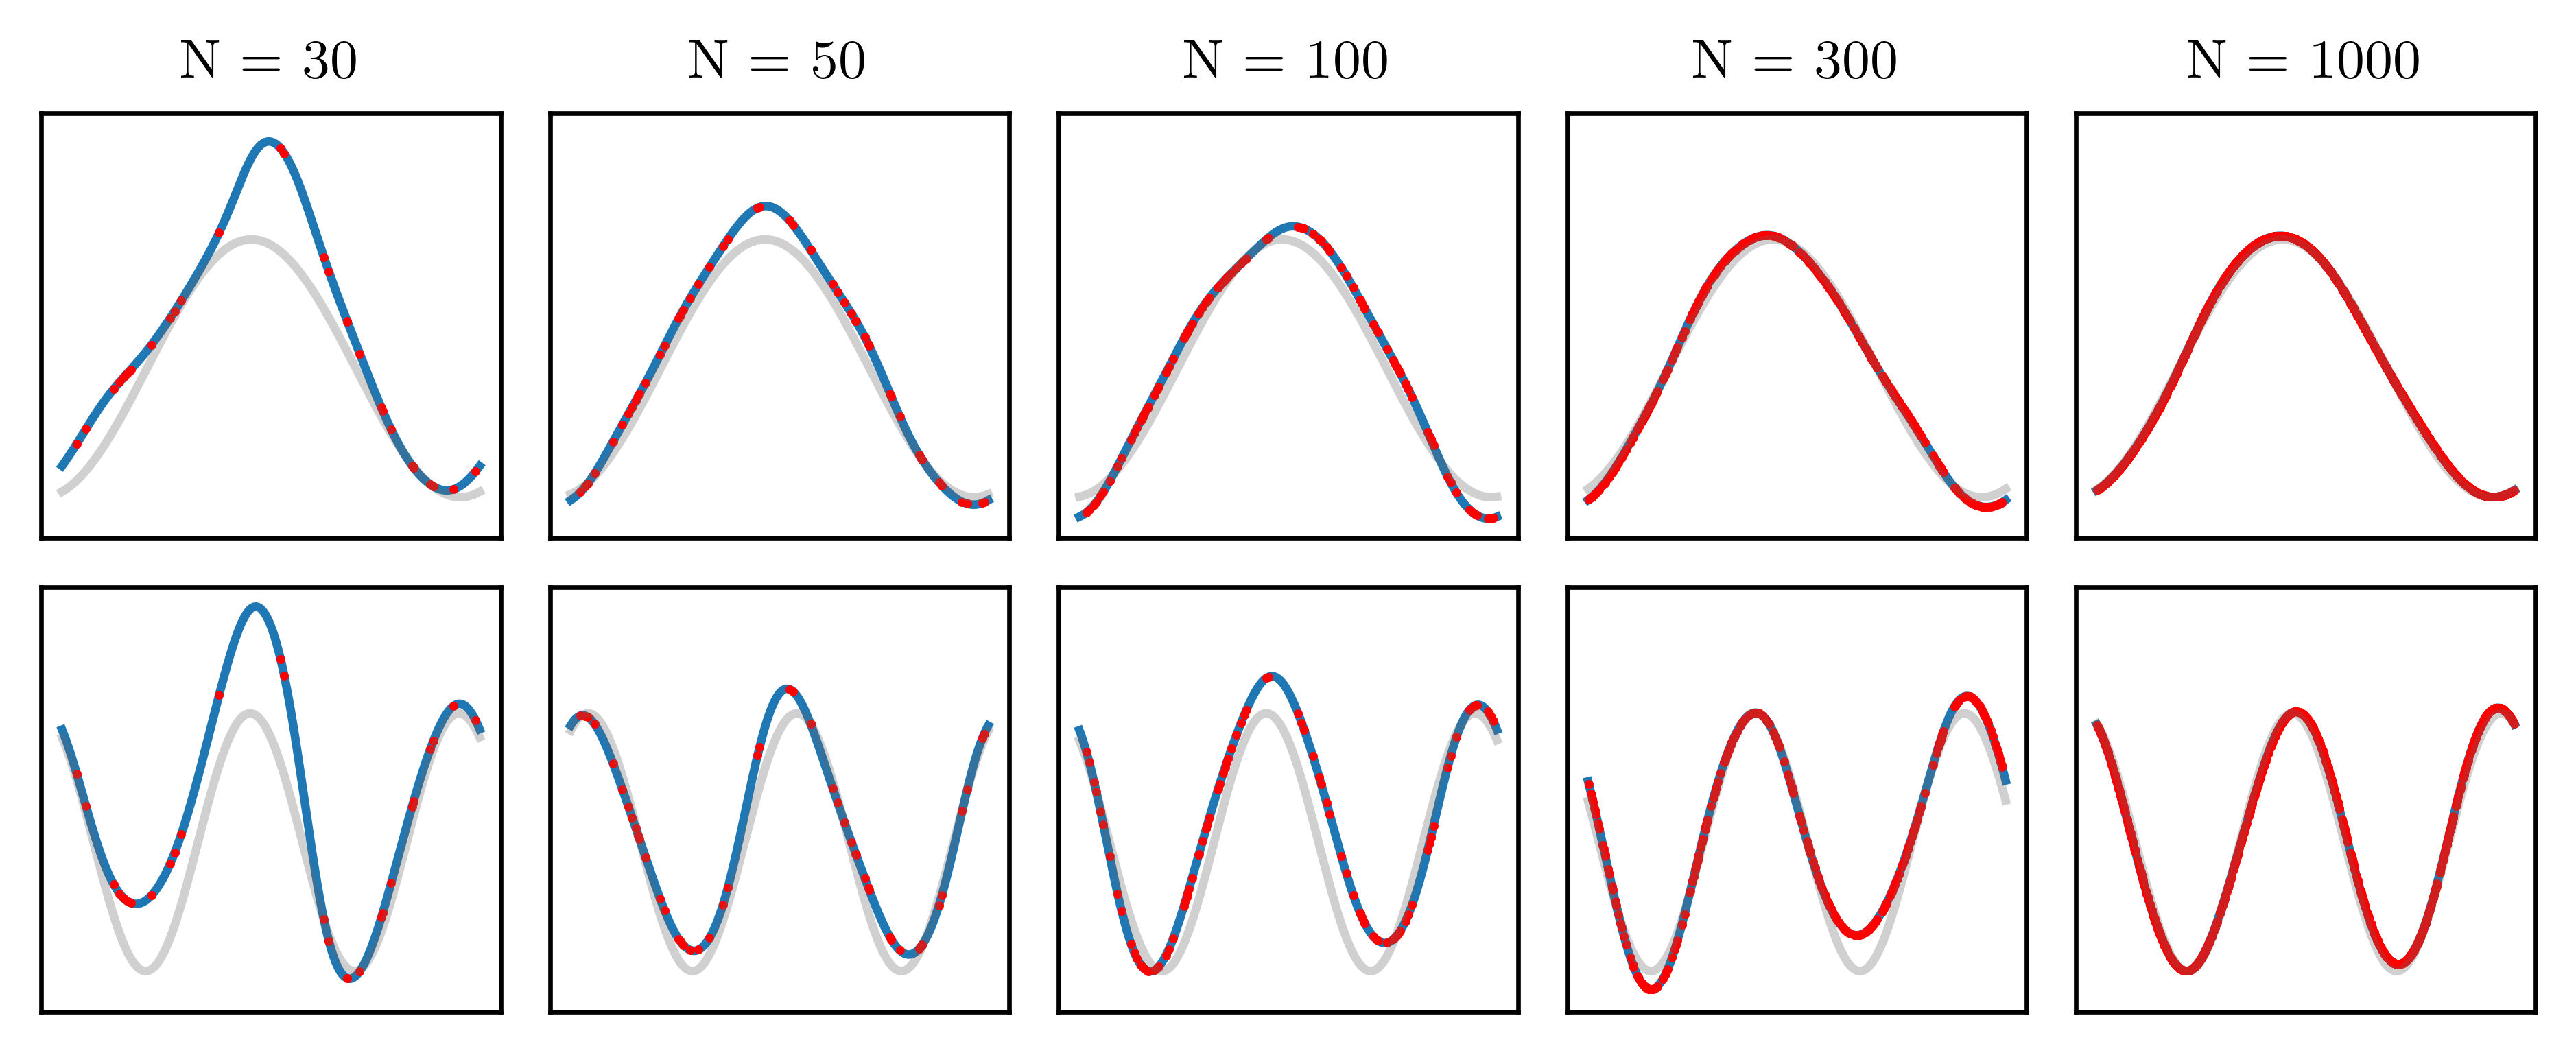

In [57]:
# sd = np.random.randint(10000)
seed = np.random.SeedSequence(840)
std = 0.01
jump = 0.0
ve = 0.01
nevL = [2,4]
fig,ax = plt.subplots(ncols=5, nrows = len(nevL), layout='tight', figsize=(16*centm,len(nevL) *3.3*centm),dpi=600,facecolor="w", sharey = True)

Nlist = [30,50,100,300,1000]

for i in range(5):
    for j in range(len(nevL)):
        r1,r2,r3,r4, ev = get_extension(seed,Nlist[i], std, jump, ve, nev = nevL[j])
        rtN = r3.shape[0]**.5
        def get_est_l2_dist(x):
            return ((r4[:,None] - (2**.5)* np.sin(2*(j+1) * np.pi * ((r3[:,None]-x[None,:])%1))/(rtN))**2).sum(0)
        phase = np.linspace(0,1,1000)[np.argmin(get_est_l2_dist(np.linspace(0,1,1000)))]
        ax[j,i].plot(r1, rtN*r2, zorder = 0)
        ax[j,i].plot(r1, rtN*(2**.5)* np.sin(2*(j+1) * np.pi * ((r1-phase)%1))/(r3.shape[0]**.5), zorder = 2, color = (.4,.4,.4), alpha = .3)
        ax[j,i].scatter(r3,rtN*r4, s = .3,zorder = 1,c = 'r')
        ax[j,i].axes.get_xaxis().set_visible(False)
        ax[j,i].axes.get_yaxis().set_visible(False)
        if j == 0:
            ax[j,i].set_title(f"N = {Nlist[i]}", color = 'black')
# for i,a in enumerate(ax.T):
#     r1,r2,r3,r4 = get_extension(seed,Nlist[i], std, jump, ve, nev = [1,2,3])
#     a.plot(r1,r2,zorder = 0)
#     a.scatter(r3,r4, s = .3,zorder = 1,c = 'r')
#     a.axes.get_xaxis().set_visible(False)
#     a.axes.get_yaxis().set_visible(False)
#     a.set_title(f"N = {Nlist[i]}", color = 'black', y = 0.99,pad=-14,x=0.5)
print(np.abs(ev[nevL]))
plt.savefig('./eigenf.pdf', format = 'pdf')

In [28]:
r4.shape

(500,)

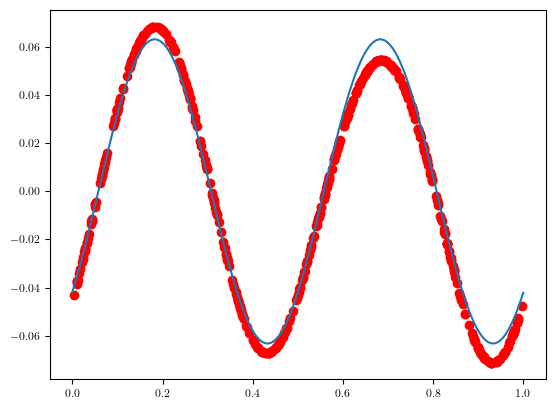

In [ ]:
plt.scatter(r3,r4, color = 'r')
plt.plot(r1, (2**.5)* np.sin(4 * np.pi * ((r1-0.5575575575575575)%1))/(r3.shape[0]**.5))

In [41]:
def get_est_l2_dist(x):
    return ((r4[:,None] - (2**.5)* np.sin(4 * np.pi * ((r3[:,None]-x[None,:])%1))/(r3.shape[0]**.5))**2).sum(0)

In [45]:
np.linspace(0,1,1000)[np.argmin(get_est_l2_dist(np.linspace(0,1,1000)))]

np.float64(0.5575575575575575)

# Fig 4

In [32]:
import matplotlib

In [33]:
plt.rc('text', usetex=True)
plt.rc('font',**{'family':'cmr10','serif':['Computer Modern Roman'],'size':'40'})
plt.rc('axes.formatter', use_mathtext=True)
centm=1/2.54
matplotlib.rcParams['lines.linewidth'] = 2.0
matplotlib.rcParams['axes.linewidth'] = 1.8
matplotlib.rcParams['grid.linewidth'] = 1.0
matplotlib.rcParams['patch.linewidth'] = 1.8
matplotlib.rcParams['xtick.major.width'] = 1.6
matplotlib.rcParams['ytick.major.width'] = 1.6
matplotlib.rcParams['xtick.minor.width'] = 1.2
matplotlib.rcParams['ytick.minor.width'] = 1.2
# matplotlib.rcParams['legend.framewidth'] = 1.5
matplotlib.rcParams['font.weight'] = 'bold'

<>:14: SyntaxWarning: invalid escape sequence '\m'
<>:14: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_2252074/3172457249.py:14: SyntaxWarning: invalid escape sequence '\m'
  g.axes.flat[0].set_ylabel("$||t^\\varepsilon - t^\\varepsilon_N||_{L^2(\mu\otimes\\nu)}$")


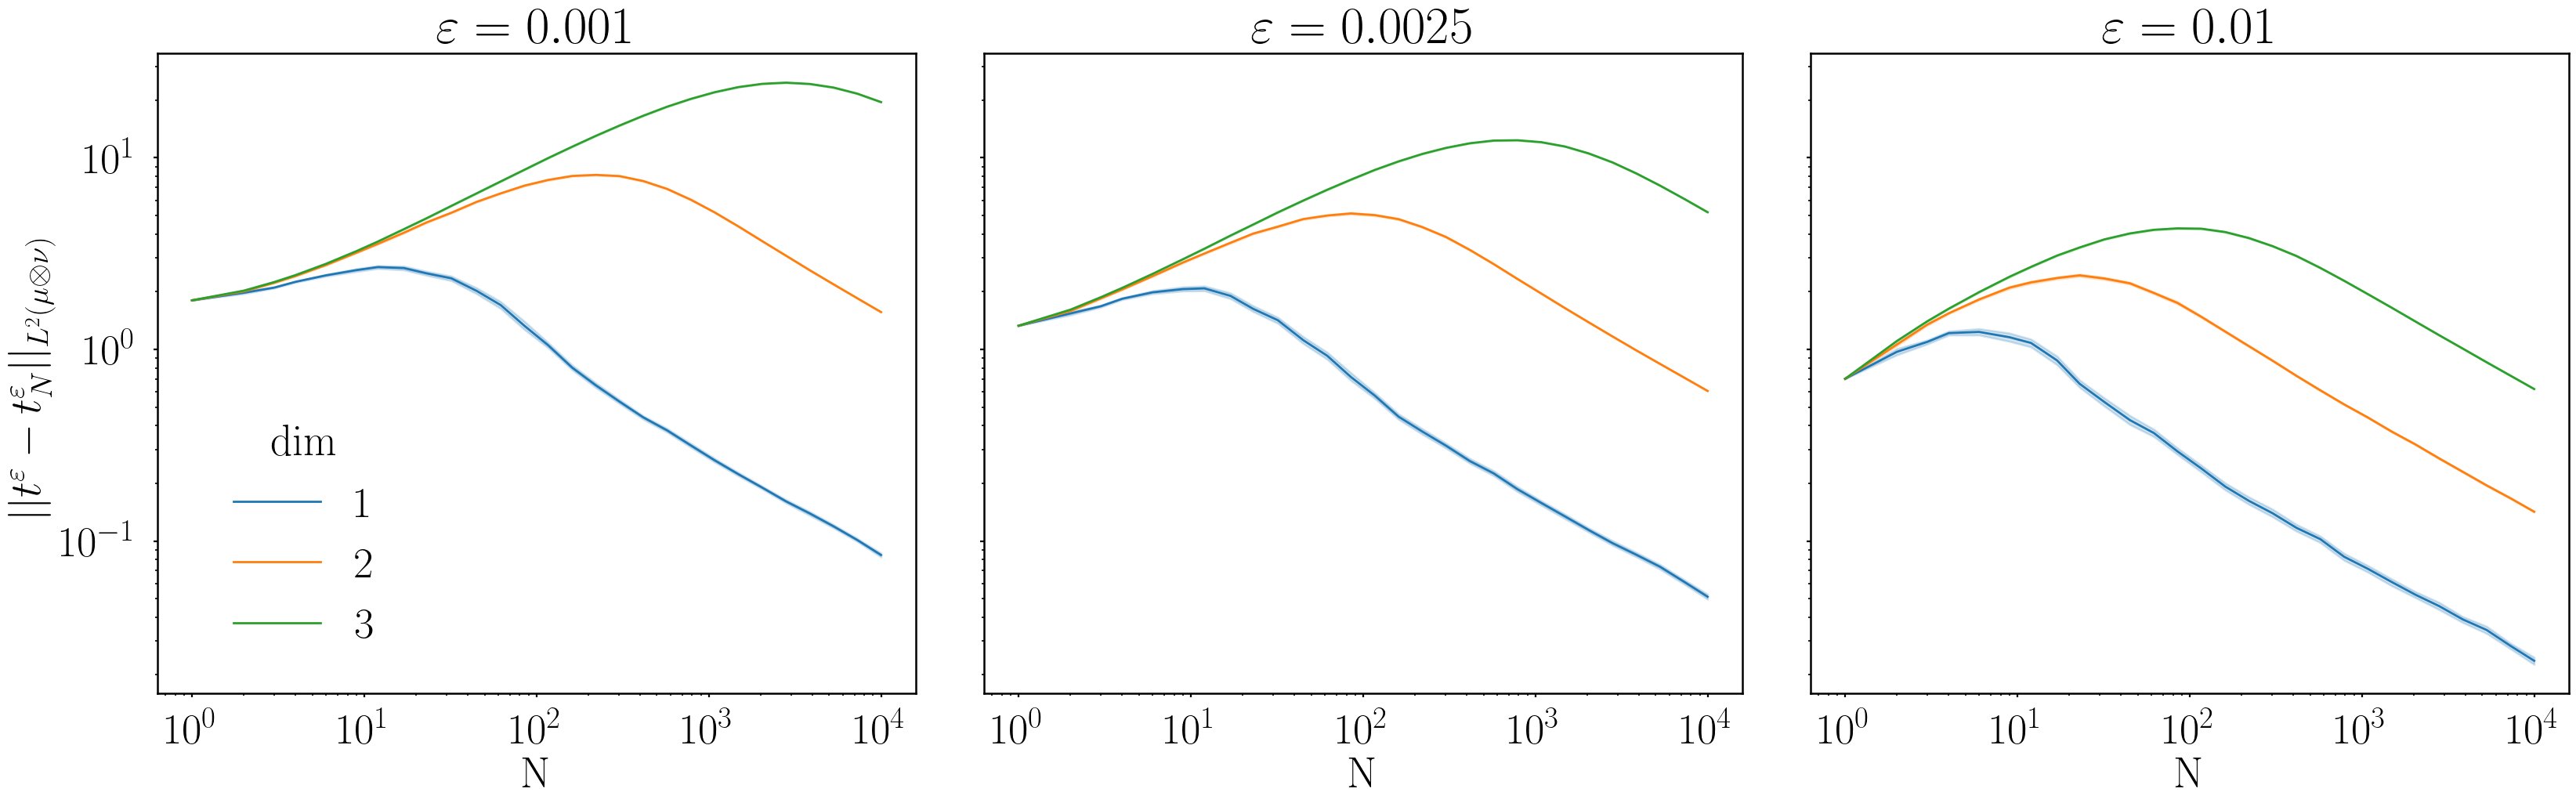

In [39]:
D4 = pd.read_csv('./dim_data.csv')
# plt.subplots(figsize = (18,6))
g = sns.relplot(D4,x = 'N', y = 'L2_2', hue = 'dim', col = 'sigma',kind = 'line',legend = 'full',palette = 'tab10', height=11)
# ax.set(xscale = 'log')
# ax.set(yscale = 'log')
# ax.spines['right'].set_visible(True)
# ax.spines['top'].set_visible(True)
for ax in g.axes.flat:
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.spines['right'].set_visible(True) 
    ax.spines['top'].set_visible(True)
    ax.tick_params(pad = 15)
g.axes.flat[0].set_ylabel("$||t^\\varepsilon - t^\\varepsilon_N||_{L^2(\mu\otimes\\nu)}$")
g.axes.flat[0].set_title('$\\varepsilon = 0.001$')
g.axes.flat[1].set_title('$\\varepsilon = 0.0025$')
g.axes.flat[2].set_title('$\\varepsilon = 0.01$')
g._legend.set_bbox_to_anchor((0.15, 0.31)) 
plt.savefig('./dim_plot.pdf', format = 'pdf')

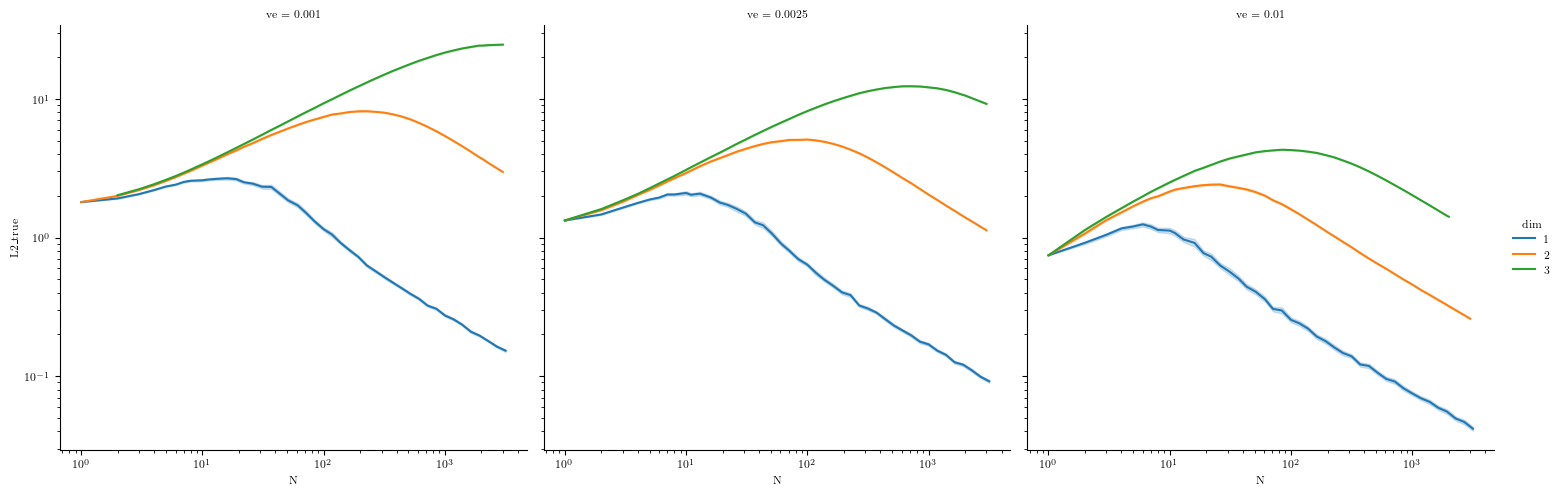

In [ ]:
D4 = pd.read_csv('./dim_data.csv')
ax = sns.relplot(D4,x = 'N', y = 'L2_true', hue = 'dim', col = 've',kind = 'line',palette = 'tab10')
ax.set(xscale = 'log')
ax.set(yscale = 'log')

In [66]:
import pickle
import matplotlib.cm as cm

In [60]:
with open('./ResUlam.pkl', 'rb') as f:
    ResUlam = pickle.load(f)

with open('./ResOTO.pkl', 'rb') as f:
    ResOTO = pickle.load(f)

with open('./ResUlam2.pkl', 'rb') as f:
    ResUlam2 = pickle.load(f)

with open('./ResOTO2.pkl', 'rb') as f:
    ResOTO2 = pickle.load(f)

In [64]:
stdL = [.05, .1,.2,.4]
epsL = reversed(torch.linspace(1e-1,1e-2,10))

<>:4: SyntaxWarning: invalid escape sequence '\s'
<>:4: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_17515/2654627663.py:4: SyntaxWarning: invalid escape sequence '\s'
  ax[0,i].set_title(f"$\sigma$ = {std}")
/tmp/ipykernel_17515/2654627663.py:8: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax[0,i].scatter(ev.real, ev.imag, c = cm.viridis((len(epsL) - j)/len(epsL)))
/tmp/ipykernel_17515/2654627663.py:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the s

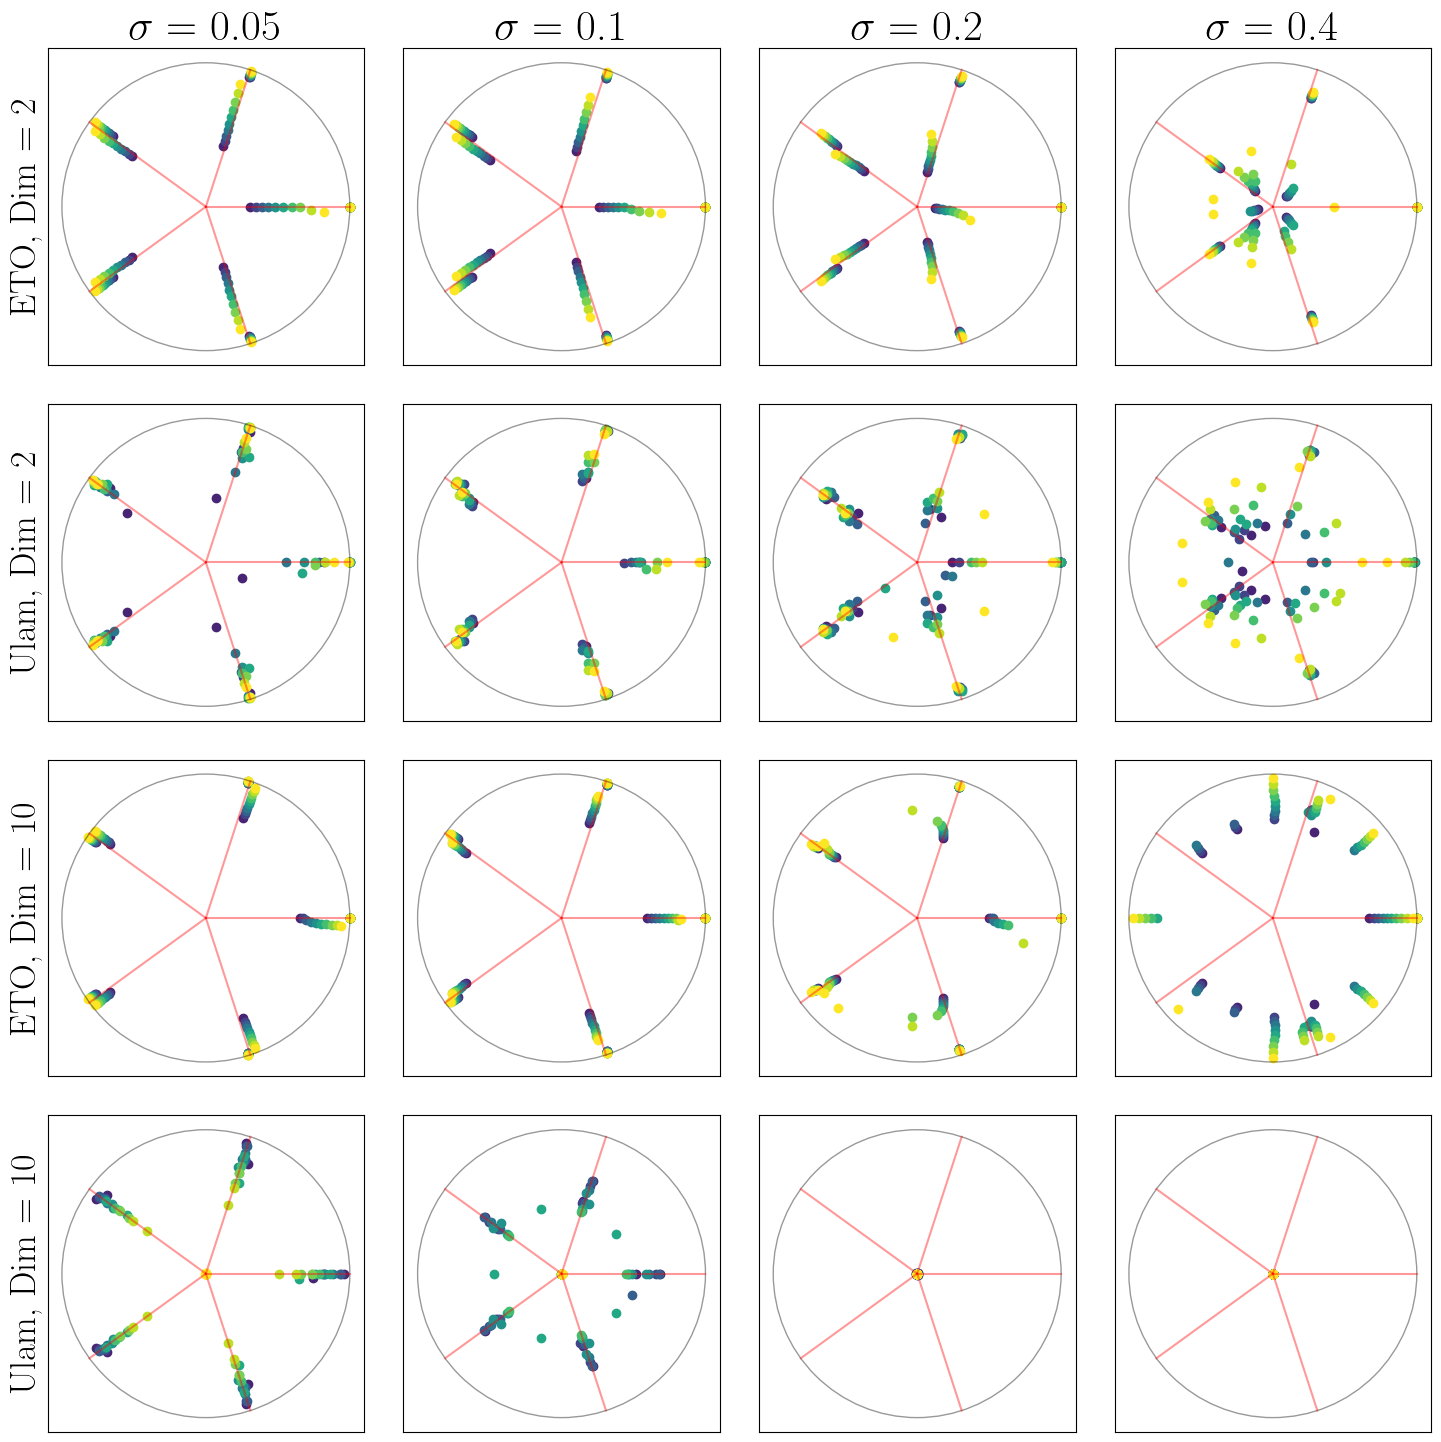

In [76]:
fig, ax = plt.subplots(ncols = len(stdL), nrows = 4, figsize = (15,15),sharex = True, sharey = True)

for i, std in enumerate(stdL):
    ax[0,i].set_title(f"$\sigma$ = {std}")
    for j in range(len(epsL))[::-1]:
        ev = ResOTO[std]['eval'][j]
        ev2 = ResUlam[std]['eval'][j]
        ax[0,i].scatter(ev.real, ev.imag, c = cm.viridis((len(epsL) - j)/len(epsL)))
        ax[1,i].scatter(ev2.real, ev2.imag, c = cm.viridis((len(epsL) - j)/len(epsL)))

        ev = ResOTO2[std]['eval'][j]
        ev2 = ResUlam2[std]['eval'][j]
        ax[2,i].scatter(ev.real, ev.imag, c = cm.viridis((len(epsL) - j)/len(epsL)))
        ax[3,i].scatter(ev2.real, ev2.imag, c = cm.viridis((len(epsL) - j)/len(epsL)))
for a in ax.ravel():
        
    for k in range(5):
        a.plot([0,np.cos(2*np.pi*k/5)],[0,np.sin(2*np.pi*k/5)], c = 'red', alpha = .4)
    circ = plt.Circle((0.0, 0.0), 1.0, facecolor='none', edgecolor='k', lw=1, alpha = .4)
    a.set_aspect('equal')
    a.set_xlim([-1.1,1.1])
    a.set_ylim([-1.1,1.1])
    a.set_xticks([])
    
    a.set_yticks([])
    a.add_patch(circ)
    a.set_ylabel('')
ax[0,0].set_ylabel("ETO, Dim = 2")
ax[1,0].set_ylabel("Ulam, Dim = 2")
ax[2,0].set_ylabel("ETO, Dim = 10")
ax[3,0].set_ylabel("Ulam, Dim = 10")
plt.tight_layout()
plt.savefig('./Ulam_mixed.pdf', format = 'pdf')